# Lab-3.2: Feature selection

**Author**: J. Hickman

**Instructions** 

* Read and work through all tutorial content and do all exercises below
* Note plots and expected outputs are included for reference 

**Submission:**

* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

# Theory: 

Correlation feature selection

The correlation feature selection (CFS) measure evaluates subsets of features on the basis of the following hypothesis: 

**"Good feature subsets contain features highly correlated with the output, yet uncorrelated to each other".**

The following equation gives the "merit" of a subset of features S consisting of k features:

$$ \mathrm {Merit} _{S_{k}}={\frac {k|{\overline {r_{cf}}|}}{\sqrt {k+k(k-1)|{\overline {r_{ff}}}|}}}  $$

$\overline{r_{xy}}$ is the average value of all input-output (feature-target) correlations (either Pearson or Spearman)

$\overline{r_{xx}}$ is the average value of all input-input (feature-feature) correlations (either Pearson or Spearman)


**Note**: The vertical lines denote absolute values 

**The subset of features S which maximizes the figure of merit, is in theory an optimal feature set**

Content source: modified from the following link(s)
* https://en.wikipedia.org/wiki/Feature_selection


**Spearman's rank correlation**

Spearman's rank correlation measures the strength and direction of association between two ranked variables. 

It basically gives the measure of monotonicity of the relation between two variables 

i.e. How well the relationship between two variables could be represented using a monotonic function.

**Monotonic**: varying in such a way that it either never decreases (always increasing) or never increases (always decreasing).


# Figure of merit 


### Import packages

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn 


The following are a few representative values of the merit score  

In [2]:
# EXAMPLE-1: (8 Features: Un-correlated X-X with correlated X-Y))
k=8
rho_xx=0
rho_xy=1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 8
merit = 2.82842712474619


In [3]:
# EXAMPLE-2: (1 Features: Un-correlated X-X with correlated X-Y)
k=1
rho_xx=0
rho_xy=1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 1
merit = 1.0


In [4]:
# EXAMPLE-2: (8 Features: Un-correlated X-X with anti-correlated X-Y)
k=8
rho_xx=0
rho_xy=-1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 8
merit = 2.82842712474619


In [5]:
# EXAMPLE-2: (4 Features: partially-correlated X-X with anti-correlated X-Y)
k=4
rho_xx=0.5
rho_xy=-1
print("number of features =",k)
print("merit =",k*np.absolute(rho_xy)/(np.sqrt(k+k*(k+1)*np.absolute(rho_xx))))

number of features = 4
merit = 1.0690449676496976


### ASSIGNMENT-1: 

* Complete the function below to compute the figure of merit given a subset of features

* Code should work for both the Pearson and Spearman correlation matrix 

**Note**: Ideally, the average should be computed with the terms on the upper-triangle of the correlation matrix.

This will remove the self-correlation terms on the main diagonal, however, this is not strictly necessary  

In [6]:
import scipy.stats
import numpy as np

def merit(x,y,correlation="pearson"): # default: pearson
    # x=matrix of features 
    # y=matrix (or vector) of targets 
    # correlation="pearson" or "spearman"
    
    # INSERT CODE HERE
    if correlation == "pearson":
        rho_xx = np.average(np.corrcoef(x,x,rowvar = False))
        rho_xy = np.average(np.corrcoef(x,y,rowvar = False))
        features  = x.shape[0]
        
    elif (correlation =='spearman'):
        rho_xx = np.average(scipy.stats.spearmanr(x,x)[0])
        rho_xy = np.average(scipy.stats.spearmanr(x,y)[0])
        features = x.shape[0]
        
    return features*np.absolute(rho_xy)/(np.sqrt(features+features*(features+1)*np.absolute(rho_xx)))

### Generate data

Run the following code to test your Merit function

In [7]:
#GENERATE INTENTIONALLY CORRELATED DATA
np.random.seed(109)
N=100
x=np.zeros((N,4))
#UN-CORRELATED INPUTS
x[:,0]=np.random.uniform(0,10,N)
x[:,1]=np.random.uniform(0,10,N)

#CORRELATED INPUTS 
print(np.random.normal(0,1,N).shape,N)
x[:,2]=x[:,0]+np.random.normal(0,1,N)
x[:,3]=x[:,1]+np.random.normal(0,1,N)

#CORRELATED OUTPUT
y=(3*x[:,0]).reshape(N,1)+5*(x[:,1]).reshape(N,1)

(100,) 100


(100, 4)
(100, 1)
merit = 0.8040398295720698
merit = 0.8079654160681691


/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


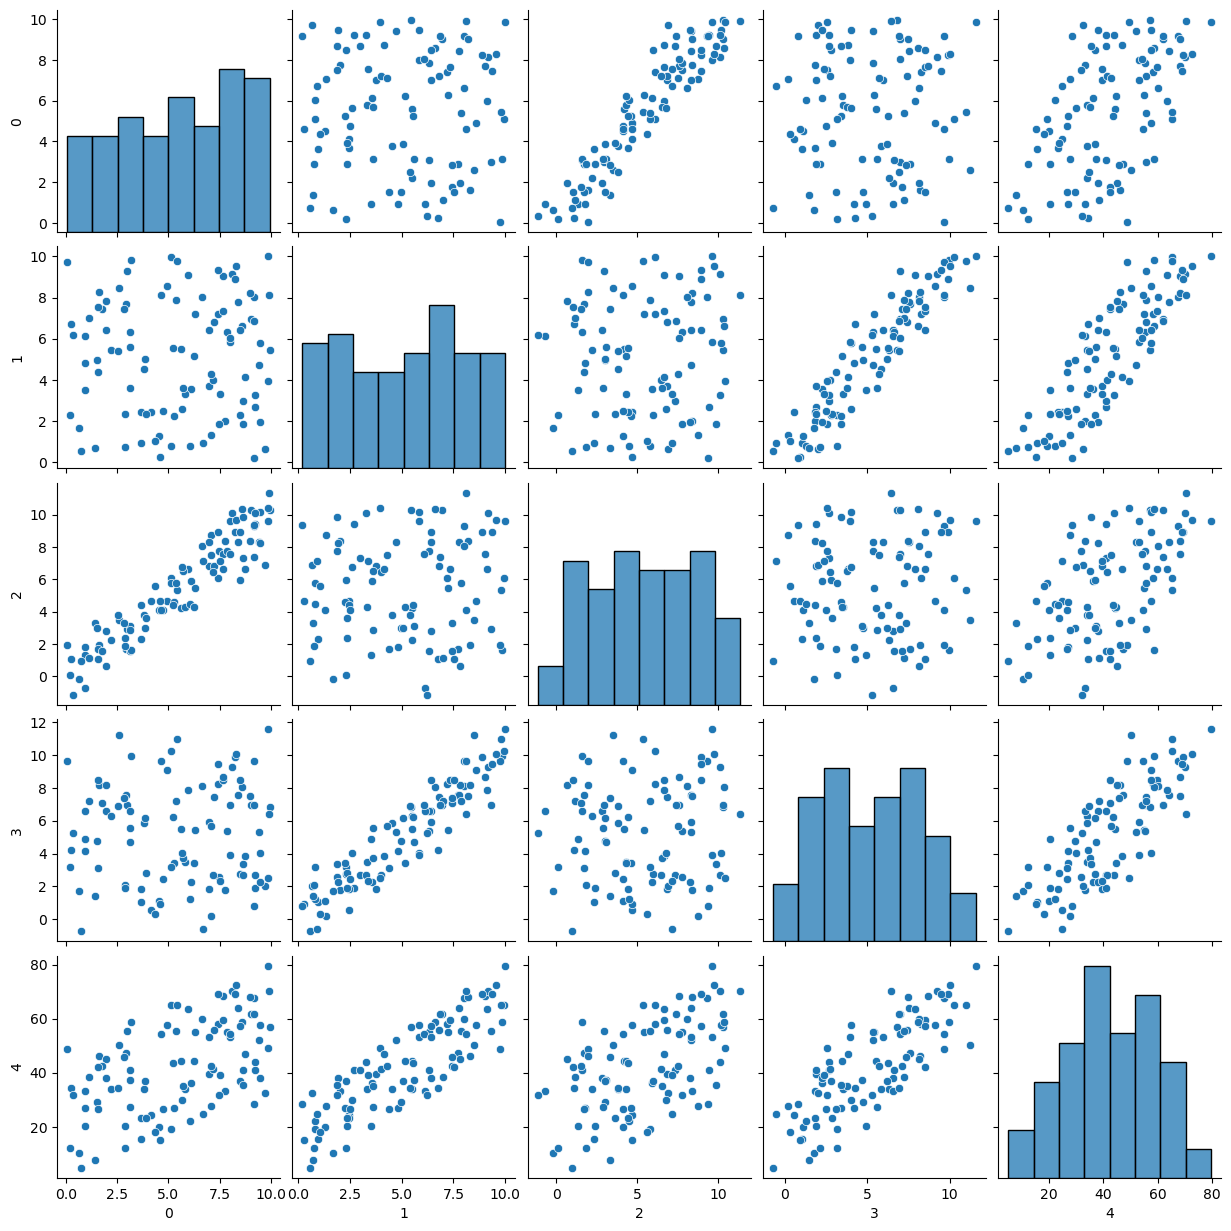

In [8]:
#UTILITY FUNCTION: 
def explore_data(x,y,iplot=True):

    #PRINT SHAPE
    print(x.shape)
    print(y.shape)

    #COMPUTE MERIT 
    print("merit =",merit(x,y,correlation="spearman")); 
    print("merit =",merit(x,y,correlation="pearson"))

    #PLOT
    if (iplot):
        sns.pairplot(pd.DataFrame(np.hstack((x,y.reshape(y.shape[0],1)))))
        plt.show()

# TEST YOUR CODE ABOVE
explore_data(x,y)

#### Aside: Combinatorics 

If the feature set is small then we can iterator over all possible combinations of feature subsets 

However,for large data-sets this becomes impractical.

This can be iteration can be done with the following python code


In [9]:
#modified from: https://stackoverflow.com/questions/464864/how-to-get-all-possible-combinations-of-a-list-s-elements
import itertools
list1 = [*range(1,4+1)]; #print(list1)
for L in range(1,len(list1) + 1): # x.shape[0]
    for subset in itertools.combinations(list1, L):
        print(list(subset))

# EXPECTED 
#x1
#x2
#x3
#x4
#x1,x2 
#x1,x3 
#x1,x4 
#x2,x3 
#x2,x4
#x3,x4
#x1,x2,x3
#x1,x2,x4
#x1,x3,x4
#x1,x2,x3,x4

[1]
[2]
[3]
[4]
[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]


### ASSIGNMENT-2: 

* Given two matrices `x` and `y`, write a function that;
  
  * Iterates over all possible subsets combinations of the x features 

  * Computes the figure of merit for the subset

  * Keeps track of the maximum Merit and returns the optimal subset at the end

In [10]:
import itertools


def maximize_CFS(x,y):
     max = 0
     # INSERT CODE HERE  
     list1 = [*range(0,4)]; #print(list1)
     num = 1
     for L in range(1,len(list1) + 1): # x.shape[0]
          for subset in itertools.combinations(list1, L): # iterating the subsets
               data = merit(x[:,subset], y) # all rows
               if data > max:
                    print("Found new max: ", data, "Optimal Features: ", list(subset), "iteration = ", num)
                    max = data
                    opt = x[:, subset]
                    # print(subset)
                    num += 1

     return opt           
          

In [11]:
# RUN SEARCH
x_opt=maximize_CFS(x,y)
# print(x_opt)

Found new max:  0.763511940849837 Optimal Features:  [0] iteration =  1
Found new max:  0.9171182796797276 Optimal Features:  [1] iteration =  2


(100, 1)
(100, 1)
merit = 0.8482293658897206
merit = 0.9171182796797276


/Users/hannahkim/opt/anaconda3/envs/dsan5000/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


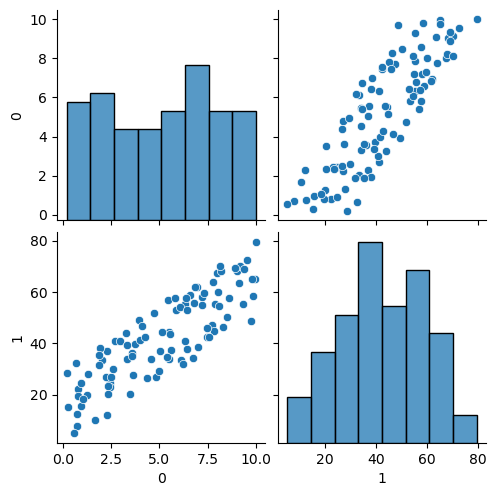

In [12]:
# EXPLORE OPTIMAL FEATURE SET 
explore_data(x_opt,y) 

# MNIST

## ASSIGNMENT-3:

Write a training function that 

* given `x_train, y_train, x_test, y_test` does the following
* Trains a Gaussian Naive Bayes classifier on the training data
* Computes and prints the accuracy for both training and test set 

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import random

def train_GNB_model(x_train,y_train,x_test,y_test,i_print=False):

    # INSERT CODE HERE
    gnb = GaussianNB()
    
    gnb.fit(x_train, y_train)
    
    train_predictions = gnb.predict(x_train)
    test_predictions = gnb.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    print("Accuracy on training set: {:.2f}".format(train_accuracy * 100))
    print("Accuracy on test set: {:.2f}".format(test_accuracy * 100))
    
    return train_accuracy, test_accuracy


#### Classification-2: MNIST Variance Threshold selection 

Run the following code to test the code you write above 

In [21]:
# DIGITS
from sklearn import datasets
(x,y)=datasets.load_digits(n_class=10, return_X_y=True, as_frame=False)

LABEL= 4


<Figure size 640x480 with 0 Axes>

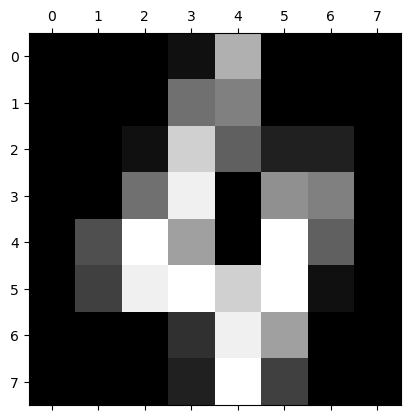

In [22]:
# PLOT ONE OF THE HAND-WRITTEN DIGITS 
import matplotlib.pyplot as plt
print("LABEL=",y[4])
plt.gray()
plt.matshow(x[4].reshape(8,8))
plt.show()

In [23]:
# SET INDICES FOR TRAIN/TEST SET
N=x.shape[0]          # number of rows
l = [*range(N)]       # indices
cut = int(0.7 * N)    # 80% of the list
random.shuffle(l)     # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:]  # last 20% of shuffled list

In [24]:
# COMPUTE UPPER AND LOWER LIMIT FOR VARIANCE ACCROSS SAMPLES
x_var=np.var(x,axis=0)
print(np.min(x_var))
print(np.max(x_var))

0.0
42.72106450836808


In [27]:
# VARIANCE THRESHOLD SEARCH

from sklearn.feature_selection import VarianceThreshold

# DEFINE GRID OF THRESHOLDS 
num_thresholds=30
thresholds=np.linspace(np.min(x_var),np.max(x_var),num_thresholds)

# DOESN"T WORK WELL WITH EDGE VALUES (ZERO VAR)
thresholds=thresholds[1:-2]; 
print(thresholds)

# INITIALIZE ARRAYS
num_features=[]
train_accuracies=[]
test_accuracies=[]

#FULL TRAINING SET
x_train=x[train_index]; y_train=y[train_index]
x_test=x[test_index]; y_test=y[test_index]
(acc_train,acc_test)=train_GNB_model(x_train,y_train,x_test,y_test,i_print=True)
num_features.append(x_train.shape[1])
train_accuracies.append(acc_train)
test_accuracies.append(acc_test)

# SEARCH FOR OPTIMAL THRESHOLD
for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold=THRESHOLD) # initialize with the threshold value. 
    xtmp=feature_selector.fit_transform(x) # input data x
    print(THRESHOLD, xtmp.shape[1])

    x_train=xtmp[train_index]; y_train=y[train_index]
    x_test=xtmp[test_index]; y_test=y[test_index]

    (acc_train,acc_test)=train_GNB_model(x_train,y_train,x_test,y_test,i_print=False)
             
    #RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)



[ 1.47314016  2.94628031  4.41942047  5.89256062  7.36570078  8.83884093
 10.31198109 11.78512124 13.2582614  14.73140155 16.20454171 17.67768187
 19.15082202 20.62396218 22.09710233 23.57024249 25.04338264 26.5165228
 27.98966295 29.46280311 30.93594326 32.40908342 33.88222358 35.35536373
 36.82850389 38.30164404 39.7747842 ]
Accuracy on training set: 85.12
Accuracy on test set: 83.70
1.4731401554609682 47
Accuracy on training set: 89.18
Accuracy on test set: 89.63
2.9462803109219364 47
Accuracy on training set: 89.18
Accuracy on test set: 89.63
4.419420466382904 45
Accuracy on training set: 90.14
Accuracy on test set: 90.19
5.892560621843873 45
Accuracy on training set: 90.14
Accuracy on test set: 90.19
7.365700777304841 45
Accuracy on training set: 90.14
Accuracy on test set: 90.19
8.838840932765809 45
Accuracy on training set: 90.14
Accuracy on test set: 90.19
10.311981088226778 42
Accuracy on training set: 89.98
Accuracy on test set: 89.81
11.785121243687746 40
Accuracy on trainin

## ASSIGNMENT-4: 

Describe in 100 to 200 words what the code in the previous cell is doing 

INSERT TEXT HERE

1. 'train_GNB_model' function
   
   __Gaussian Naive Bayes Model__ is a probabilistic machine learning algorithm used for classification tasks.
* The gnb function receives arguments: x_train, x_test, and y_train, y_test, which are the training and testing _feature_ datasets and training and testing _target_ datasets, and the function returns the accuracy which will be discussed further.
* The function trains the feature x and target y data and makes a prediction of the test data.
* By calculating the accuracy, we can see the performance of the model. 

2. Classification-2: MNIST Variance Threshold selection 
* First, we need to load the dataset that is a matrix with x and y columns.
* Second, plot a 4 by 4 matrix.
* Finally, assign 80% of the dataset to train dataset and assign the rest of 20% to the test dataset.
* After computing the lower and upper limit for the features, move onto Variance threshold search. 

3. Explanation of what the previous cell is doing: __Variance threshold search__
   
   We are trying to get the optimized threshold. So, we assign 30 vlaues in the 'threshold' variable from the minimum value of the feature to the maximum value of the feature with evenly spaced numbers. After assigning values in the training datasets and test datasets arrays, we receive both the accuracy of the training dataset and test dataset, which means how _well_ the model predict between the feature training data and test data, and also for the target training data and test data. Then, we need to find the optimal threshold value using the VarianceThreshold package. In the for loop, the loop goes over for each threshold values, and prints out the current threshold value and the features. It also keeps track on the accuracy values for both training and test datasets. This will go on for the number of threshold, and we can find the optimal threshold. But a better way to intuitively see the optimal value is to plot the vlaues out as below, by ploting out the accuracy as an y-axis. As plotted below, this gives us a result that: approximately 50 of features will give us the best accuracy. 


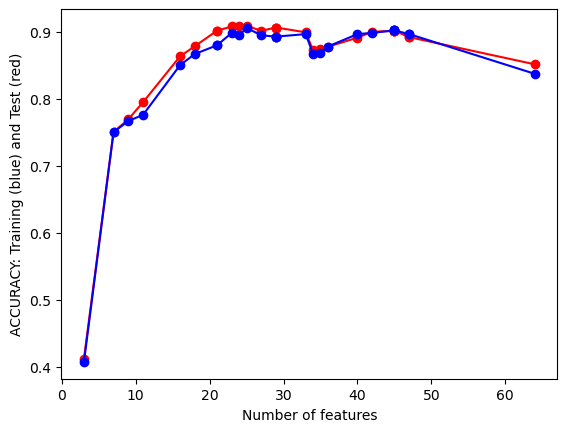

In [26]:
#PLOT-1
plt.plot(num_features,train_accuracies,'-or')
plt.plot(num_features,test_accuracies,'-ob')
plt.xlabel('Number of features')
plt.ylabel('ACCURACY: Training (blue) and Test (red)')
plt.show()
